# Assignment 2.1 Use Case - Tayko Software Cataloger

In [22]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
import seaborn as sns


import dmba
from dmba import regressionSummary
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline

This case study examines how Tayko, a software catalog firm that sells games and educational software, prepared to launch a revised collection of items in a new catalog mailing. Tayko began as a software manufacturer and later expanded its offerings to include third-party titles, making its customer list a valuable asset. Because mailing is costly and most recipients are unlikely to purchase, the objective is to minimize wasted expenses by identifying customers with a higher probability of responding. In this analysis, logistic regression, multiple linear regression, and regression trees are applied to recommend which customers should receive the catalog and to estimate their expected spending, with the goal of optimizing the mailing campaign and improving gross profits.


In [23]:
df=pd.read_csv('Tayko.csv')

# Basic information
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
df.head()

Shape of dataset: (2000, 25)

Data types:
 sequence_number         int64
US                      int64
source_a                int64
source_c                int64
source_b                int64
source_d                int64
source_e                int64
source_m                int64
source_o                int64
source_h                int64
source_r                int64
source_s                int64
source_t                int64
source_u                int64
source_p                int64
source_x                int64
source_w                int64
Freq                    int64
last_update_days_ago    int64
1st_update_days_ago     int64
Web order               int64
Gender=male             int64
Address_is_res          int64
Purchase                int64
Spending                int64
dtype: object


,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0


In [24]:
df.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.62500
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.78261
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,2.00000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,153.00000
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.00000


In [25]:
display(df.columns)

Index(['sequence_number', 'US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res', 'Purchase', 'Spending'],
      dtype='object')

In [26]:
df.isnull().sum() # Check for missing values

sequence_number         0
US                      0
source_a                0
source_c                0
source_b                0
source_d                0
source_e                0
source_m                0
source_o                0
source_h                0
source_r                0
source_s                0
source_t                0
source_u                0
source_p                0
source_x                0
source_w                0
Freq                    0
last_update_days_ago    0
1st_update_days_ago     0
Web order               0
Gender=male             0
Address_is_res          0
Purchase                0
Spending                0
dtype: int64

## 1. Gross Profit = Expect Revenue - Mailing Cost

In [ ]:
# 1. Computer the average spending perv person in the test mailing (Including purchase and non purchased, non purchaser spent = 0)
ave_spending = df['Spending'].mean()

# 2. Get the total revunue which is the answer multiply 180,000

expected_revenue = ave_spending * 180_000
mailing_cost = 180_000 * 2


# 3. Substract the mailing cost: 180,000 x 2 =$360,000
gross_profit = expected_revenue - mailing_cost

print('Average spending per person:', ave_spending)
print('Expected revenue:', expected_revenue)
print('mailing cost:', mailing_cost)
print('Gross profit:', gross_profit)


Average spending per person: 102.625
Expected revenue: 18472500.0
mailing cost: 360000
Gross profit: 18112500.0


In [28]:
df["US"].value_counts()

US
1    1649
0     351
Name: count, dtype: int64

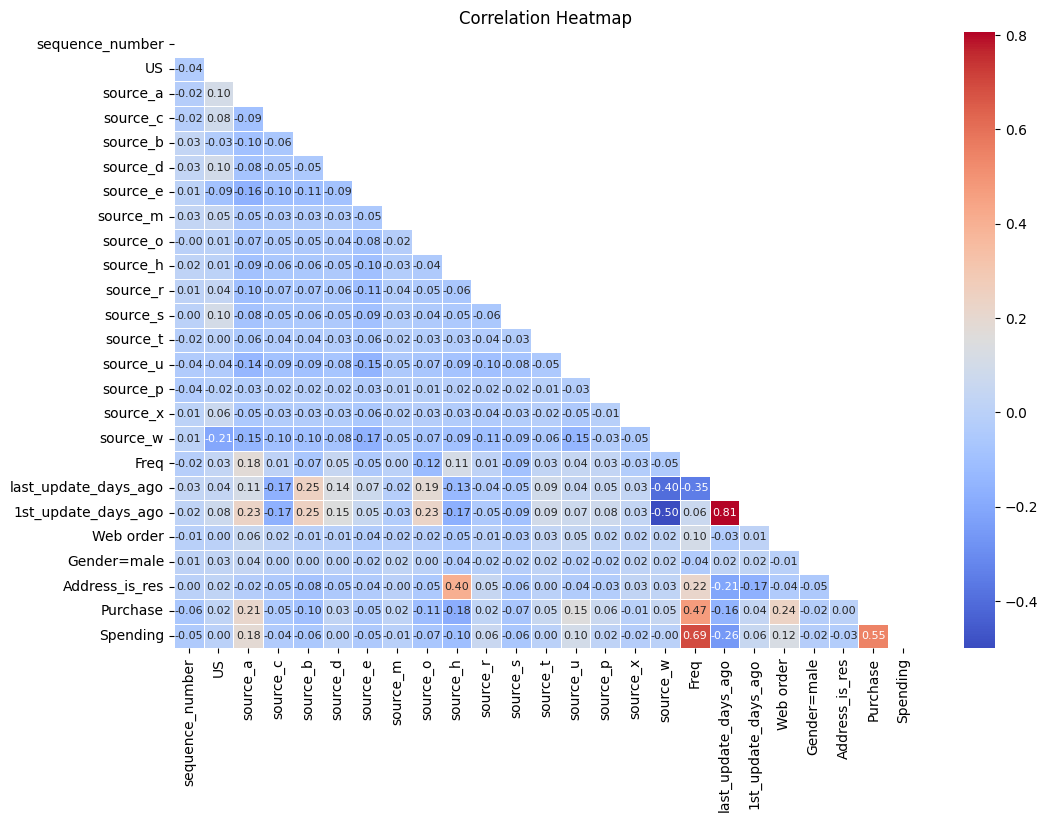

In [34]:
corr = df.corr(numeric_only=True)

# Upper Triangle plot
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12,8))
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=True, 
            annot_kws={"size": 8}, fmt=".2f", linewidths=0.5)
plt.xticks(rotation=90)
plt.title("Correlation Heatmap")
plt.show()

## 2. Logistic regression Modeling (Model for classifying a customer as a purchaser or nonpurchaser)

### 2.1 

In [ ]:
predictors = ['']


X = pd.
train_X, valid_X, train_y, valid_y

### 2.2

## 3. Models for predicting *spending * among the purchasers

### 3.1 Multiple linear regression

### 3.2 Regression trees

### 3.3 choose one model and explain

## 4. 

### 4.1 add a column - Logistic regression

### 4.2 add another column - predict spending amount from he prediction model chosen

### 4.3 skip

### 4.4 add a column for expected spending 

### 4.5 plot cumulative gains chart of the expected spending

### 4.6 using this cumulative gai9ns curve (not directly), estimate the gross profit - based on the model.